In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


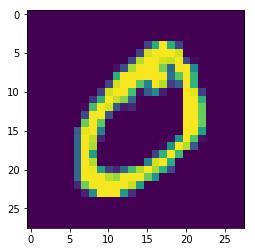

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,regularizers
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(30, 3, 3))#22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11
model.add(Convolution2D(10, 1, 1)) #11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(18, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(30, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1)) #5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))



model.summary()

W0623 17:25:12.020912 140683960080256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  
W0623 17:25:12.040682 140683960080256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 17:25:12.044395 140683960080256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 17:25:12.079478 140683960080256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 10)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5))`


### Image normalization


In [0]:
from keras.optimizers import Adam

import keras.backend as K

from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


# L2 regularization 
def custom_loss(actual,predicted):
    sqr_w = 0
    lamda = 0.0001

    for layer in model.layers:
       sqr_w = sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))

    l2_regularization = (lamda*sqr_w)/2*(128) 
    loss = K.categorical_crossentropy(actual,predicted) + l2_regularization

    # Return a function
    return loss
  

model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])


# Image normalization
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)

datagen_validator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)

# fitting for training set
datagen.fit(X_train)
# fitting for test set
datagen_validator.fit(X_test)

train= model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128,shuffle=True),
                    steps_per_epoch=int(np.ceil(len(X_train)/128)), 
                    epochs=10, verbose=1, validation_data=datagen_validator.flow(X_test, Y_test, batch_size=128,shuffle=True), 
                    validation_steps = int(np.ceil(len(X_test)/128)), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)],)




W0623 17:25:13.967118 140683960080256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 17:25:15.095802 140683960080256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 18s 39ms/step - loss: 2.6446 - acc: 0.9046 - val_loss: 2.4330 - val_acc: 0.9735
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 15s 31ms/step - loss: 2.4210 - acc: 0.9757 - val_loss: 2.4204 - val_acc: 0.9744
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 15s 31ms/step - loss: 2.4036 - acc: 0.9816 - val_loss: 2.3839 - val_acc: 0.9871
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 15s 31ms/step - loss: 2.3961 - acc: 0.9837 - val_loss: 2.3812 - val_acc: 0.9882
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 15s 32ms/step - loss: 2.3891 - acc: 0.9863

In [0]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 


### Top 25 misclassified images


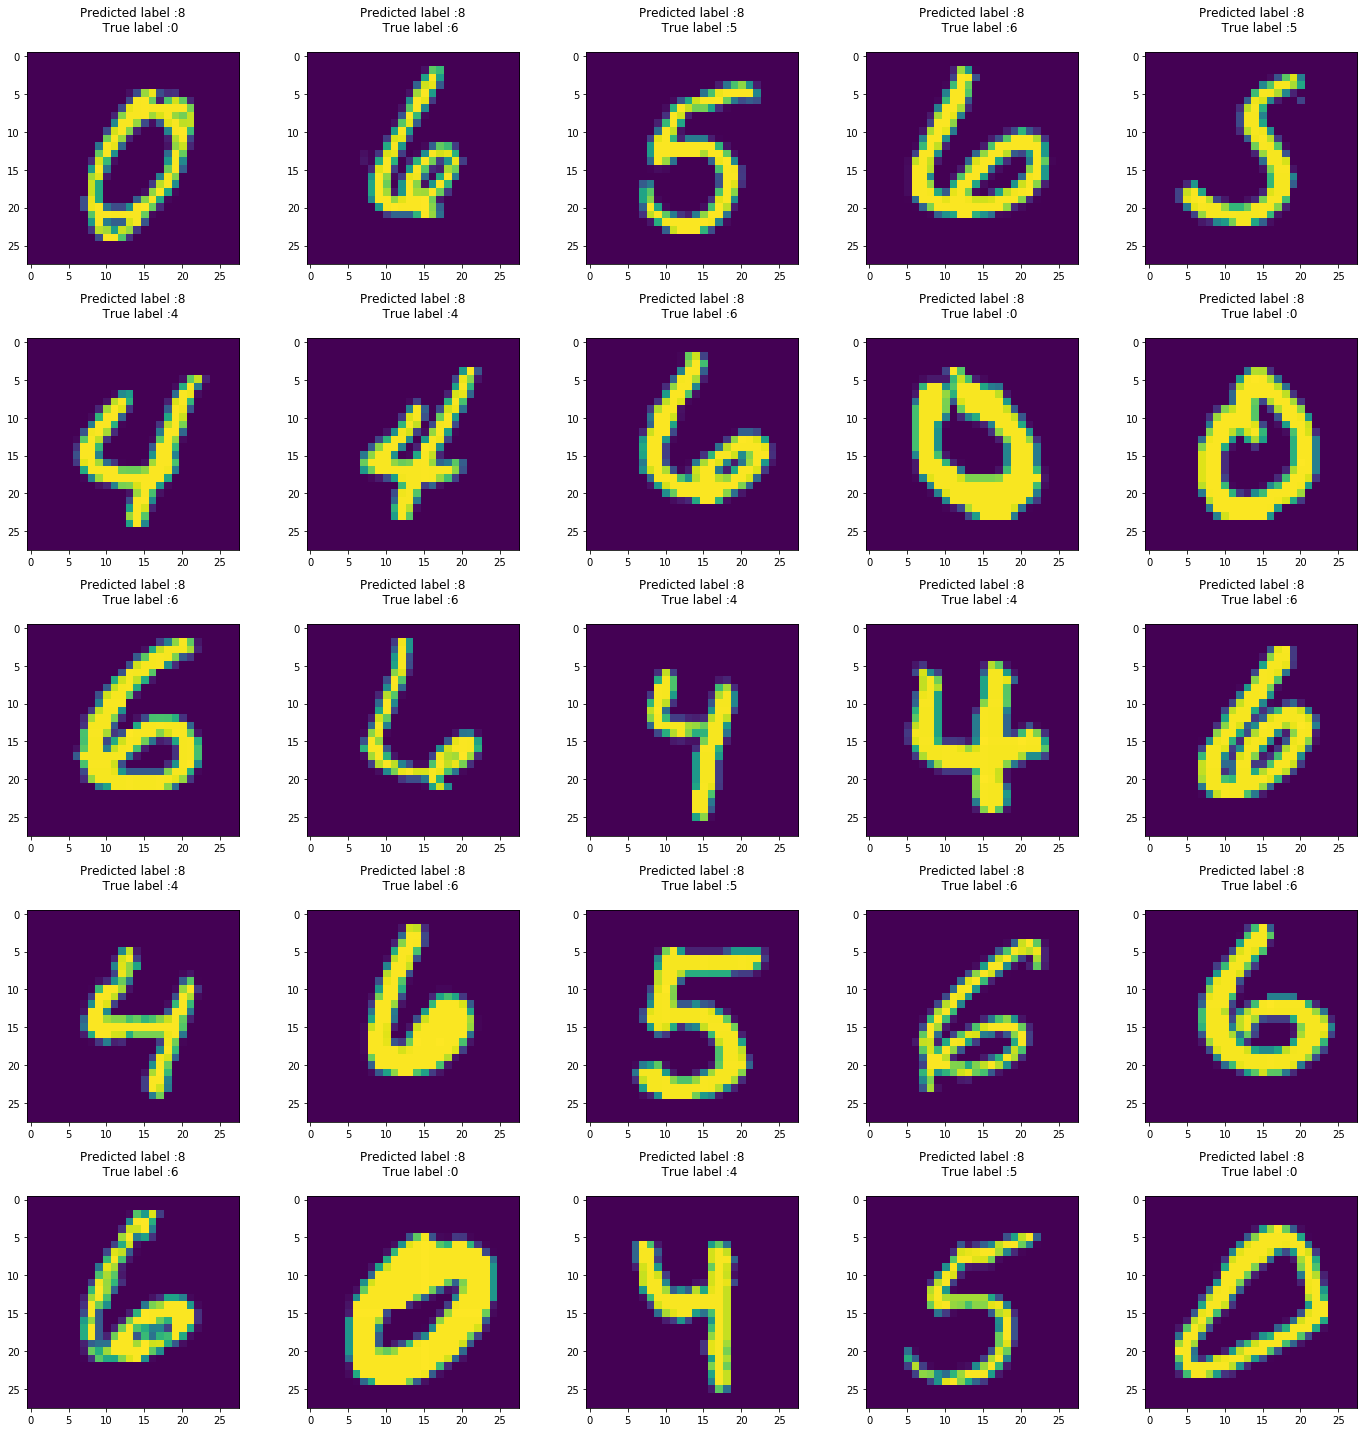

In [19]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows top 25 images with their predicted and real labels"""
    n = 0
    nrows = 5
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,figsize=(20,20))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\n    True label :{}\n".format(pred_errors[error],obs_errors[error]))
            plt.tight_layout()
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 25 errors 
most_important_errors = sorted_dela_errors[100:]

# Show the top 25 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)